## Dataset 2 - Food Service Establishment-Inspections 
## Student ID : x20165749 
## Name : Veeresh Shivabasappa Kumbi 
## MSc in Data Analytics

In [7]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score


In [8]:
data = pd.read_csv("C:/Users/Shivasheela/Desktop/DMML Project/food-service-establishment-inspections/food-service-establishment-inspections-beginning-2005.csv")
data.head()

,ADDRESS,OPERATION NAME,DATE OF INSPECTION,VIOLATION ITEM,VIOLATION DESCRIPTION,CRITICAL VIOLATION,TOTAL # CRITICAL VIOLATIONS,TOTAL # CRIT. NOT CORRECTED,TOTAL # NONCRITICAL VIOLATIONS,LOCAL HEALTH DEPARTMENT,...,PERMITTED (D/B/A),PERMITTED CORP. NAME,PERM. OPERATOR LAST NAME,PERM. OPERATOR FIRST NAME,NYS HEALTH OPERATION ID,INSPECTION TYPE,INSPECTION COMMENTS,FS FACILITY STATE,LATITUDE,LONGITUDE
0,"373 CANADA STREET, LAKE GEORGE",JOHN BARLEYCORN RESTAURANT & PUB/Dormant,08/31/2012,1B,"Water/ice: unsafe, unapproved sources, cross c...",Critical Violation,1.0,0.0,14.0,Glens Falls District Office,...,NaN,"FIRESIDE GRILL, LLC.",DWYER,JOHN,797701,Inspection,NaN,NY,43.427506,-73.711944
1,"2639 ROUTE 9, MALTA",PIZZA NOOK/Inactive,10/14/2014,1B,"Water/ice: unsafe, unapproved sources, cross c...",Critical Violation,4.0,0.0,9.0,Glens Falls District Office,...,NaN,NaN,ISMAIL,ASHFAQUE,687752,Inspection,NaN,NY,42.983758,-73.786669
2,"25 WILTON ROAD, GREENFIELD CENTER",SCNS - GREENFIELD COMM. CENTER/Inactive,12/09/2015,1B,"Water/ice: unsafe, unapproved sources, cross c...",Critical Violation,1.0,0.0,0.0,Glens Falls District Office,...,NaN,"PRESTIGE SERVICES, INC.",WILLIAMS,CHRIS,333621,Inspection,"11 meals, no eat-ins for 12/9/15. \nPlease con...",NY,43.128250,-73.845040
3,"2839 ROUTE 9, BALLSTON SPA",ALMOST SARATOGA/Inactive,11/30/2016,1B,"Water/ice: unsafe, unapproved sources, cross c...",Critical Violation,3.0,0.0,26.0,Glens Falls District Office,...,NaN,2839 LCM CORP.,BOYARK,CHRISTOPHER,912014,Inspection,All violations must be corrected and are subje...,NY,43.012214,-73.789782
4,"663 ROUTE 28, RICHFIELD SPRINGS",Mister Shake/Dormant,04/15/2009,1B,"Water/ice: unsafe, unapproved sources, cross c...",Critical Violation,1.0,0.0,0.0,Herkimer District Office,...,NaN,NaN,HILTS,RICHARD,338915,Inspection,NaN,NY,42.857709,-74.998152


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678271 entries, 0 to 678270
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ADDRESS                         678244 non-null  object 
 1   OPERATION NAME                  678271 non-null  object 
 2   DATE OF INSPECTION              678271 non-null  object 
 3   VIOLATION ITEM                  678271 non-null  object 
 4   VIOLATION DESCRIPTION           577252 non-null  object 
 5   CRITICAL VIOLATION              678271 non-null  object 
 6   TOTAL # CRITICAL VIOLATIONS     644486 non-null  float64
 7   TOTAL # CRIT.  NOT CORRECTED    643538 non-null  float64
 8   TOTAL # NONCRITICAL VIOLATIONS  644603 non-null  float64
 9   LOCAL HEALTH DEPARTMENT         678271 non-null  object 
 10  COUNTY                          678271 non-null  object 
 11  FACILITY CODE                   678271 non-null  object 
 12  FACILITY ADDRESS

In [10]:
#Dropping all the unnecessary columns
food_df=data.drop(['ADDRESS','OPERATION NAME','FACILITY CODE','FACILITY ADDRESS','FACILITY CITY','FACILITY POSTAL ZIPCODE','NYSDOH GAZETTEER (1980)','FACILITY MUNICIPALITY','PERMIT EXPIRATION DATE'
                      ,'PERMITTED  CORP. NAME','PERM. OPERATOR LAST NAME','PERM. OPERATOR FIRST NAME','LATITUDE','LONGITUDE'],axis=1) 
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678271 entries, 0 to 678270
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DATE OF INSPECTION              678271 non-null  object 
 1   VIOLATION ITEM                  678271 non-null  object 
 2   VIOLATION DESCRIPTION           577252 non-null  object 
 3   CRITICAL VIOLATION              678271 non-null  object 
 4   TOTAL # CRITICAL VIOLATIONS     644486 non-null  float64
 5   TOTAL # CRIT.  NOT CORRECTED    643538 non-null  float64
 6   TOTAL # NONCRITICAL VIOLATIONS  644603 non-null  float64
 7   LOCAL HEALTH DEPARTMENT         678271 non-null  object 
 8   COUNTY                          678271 non-null  object 
 9   FOOD SERVICE TYPE               678271 non-null  object 
 10  FOOD SERVICE DESCRIPTION        678271 non-null  object 
 11  PERMITTED  (D/B/A)              83986 non-null   object 
 12  NYS HEALTH OPERA

In [11]:
food_df.duplicated().sum()

967

In [12]:
food_df.drop_duplicates(inplace=True)
food_df.head()

,DATE OF INSPECTION,VIOLATION ITEM,VIOLATION DESCRIPTION,CRITICAL VIOLATION,TOTAL # CRITICAL VIOLATIONS,TOTAL # CRIT. NOT CORRECTED,TOTAL # NONCRITICAL VIOLATIONS,LOCAL HEALTH DEPARTMENT,COUNTY,FOOD SERVICE TYPE,FOOD SERVICE DESCRIPTION,PERMITTED (D/B/A),NYS HEALTH OPERATION ID,INSPECTION TYPE,INSPECTION COMMENTS,FS FACILITY STATE
0,08/31/2012,1B,"Water/ice: unsafe, unapproved sources, cross c...",Critical Violation,1.0,0.0,14.0,Glens Falls District Office,WARREN,Food Service Establishment,Food Service Establishment,NaN,797701,Inspection,NaN,NY
1,10/14/2014,1B,"Water/ice: unsafe, unapproved sources, cross c...",Critical Violation,4.0,0.0,9.0,Glens Falls District Office,SARATOGA,Food Service Establishment,Food Service Establishment,NaN,687752,Inspection,NaN,NY
2,12/09/2015,1B,"Water/ice: unsafe, unapproved sources, cross c...",Critical Violation,1.0,0.0,0.0,Glens Falls District Office,SARATOGA,SOFA Food Service,SOFA Satellite Site -State Office for the Aging,NaN,333621,Inspection,"11 meals, no eat-ins for 12/9/15. \nPlease con...",NY
3,11/30/2016,1B,"Water/ice: unsafe, unapproved sources, cross c...",Critical Violation,3.0,0.0,26.0,Glens Falls District Office,SARATOGA,Food Service Establishment,Food Service Establishment,NaN,912014,Inspection,All violations must be corrected and are subje...,NY
4,04/15/2009,1B,"Water/ice: unsafe, unapproved sources, cross c...",Critical Violation,1.0,0.0,0.0,Herkimer District Office,HERKIMER,Food Service Establishment,Restaurant,NaN,338915,Inspection,NaN,NY


In [13]:
#Cross checking to find if the dataset contains any duplicates
food_df.duplicated().sum()

0

In [14]:
#Remove the NaN values from the dataset
food_df.isnull().sum()

DATE OF INSPECTION                     0
VIOLATION ITEM                         0
VIOLATION DESCRIPTION             100718
CRITICAL VIOLATION                     0
TOTAL # CRITICAL VIOLATIONS        33655
TOTAL # CRIT.  NOT CORRECTED       34603
TOTAL # NONCRITICAL VIOLATIONS     33538
LOCAL HEALTH DEPARTMENT                0
COUNTY                                 0
FOOD SERVICE TYPE                      0
FOOD SERVICE DESCRIPTION               0
PERMITTED  (D/B/A)                593324
NYS HEALTH OPERATION ID                0
INSPECTION TYPE                        0
INSPECTION COMMENTS               578851
FS FACILITY STATE                      0
dtype: int64

In [15]:
# Dropping the 'any' values from the dataset
food_df.dropna(how='any',inplace=True)
food_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6484 entries, 102 to 678177
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DATE OF INSPECTION              6484 non-null   object 
 1   VIOLATION ITEM                  6484 non-null   object 
 2   VIOLATION DESCRIPTION           6484 non-null   object 
 3   CRITICAL VIOLATION              6484 non-null   object 
 4   TOTAL # CRITICAL VIOLATIONS     6484 non-null   float64
 5   TOTAL # CRIT.  NOT CORRECTED    6484 non-null   float64
 6   TOTAL # NONCRITICAL VIOLATIONS  6484 non-null   float64
 7   LOCAL HEALTH DEPARTMENT         6484 non-null   object 
 8   COUNTY                          6484 non-null   object 
 9   FOOD SERVICE TYPE               6484 non-null   object 
 10  FOOD SERVICE DESCRIPTION        6484 non-null   object 
 11  PERMITTED  (D/B/A)              6484 non-null   object 
 12  NYS HEALTH OPERATION ID       

In [16]:
food_df.columns

Index(['DATE OF INSPECTION', 'VIOLATION ITEM', 'VIOLATION DESCRIPTION',
       'CRITICAL VIOLATION', 'TOTAL # CRITICAL VIOLATIONS',
       'TOTAL # CRIT.  NOT CORRECTED ', 'TOTAL # NONCRITICAL VIOLATIONS',
       'LOCAL HEALTH DEPARTMENT', 'COUNTY', 'FOOD SERVICE TYPE',
       'FOOD SERVICE DESCRIPTION', 'PERMITTED  (D/B/A)',
       'NYS HEALTH OPERATION ID', 'INSPECTION TYPE', 'INSPECTION COMMENTS',
       'FS FACILITY STATE'],
      dtype='object')

Index(['DATE OF INSPECTION', 'VIOLATION ITEM', 'VIOLATION DESCRIPTION',
       'CRITICAL VIOLATION', 'TOTAL # CRITICAL VIOLATIONS',
       'TOTAL # CRIT.  NOT CORRECTED ', 'TOTAL # NONCRITICAL VIOLATIONS',
       'LOCAL HEALTH DEPARTMENT', 'COUNTY', 'FOOD SERVICE TYPE',
       'FOOD SERVICE DESCRIPTION', 'PERMITTED  (D/B/A)',
       'NYS HEALTH OPERATION ID', 'INSPECTION TYPE', 'INSPECTION COMMENTS',
       'FS FACILITY STATE'],
      dtype='object')

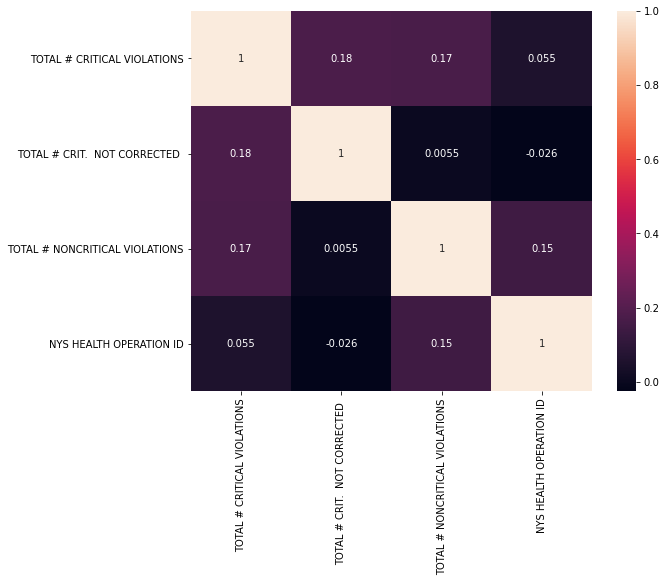

In [17]:
corr = food_df.corr(method='kendall')
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True)
food_df.columns

# VISUALISATION

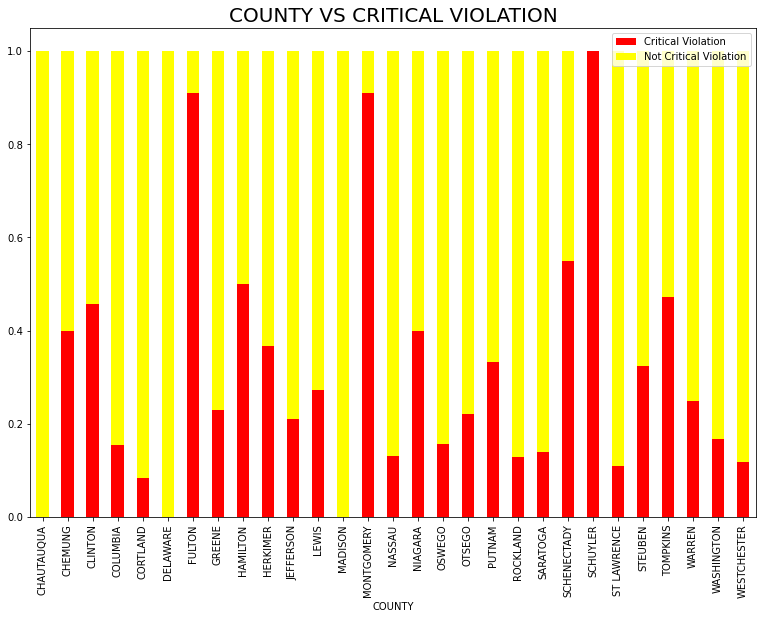

In [18]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(food_df['COUNTY'], food_df['CRITICAL VIOLATION'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('COUNTY VS CRITICAL VIOLATION', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

C:\Users\Shivasheela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivasheela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivasheela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Inspection as per County')

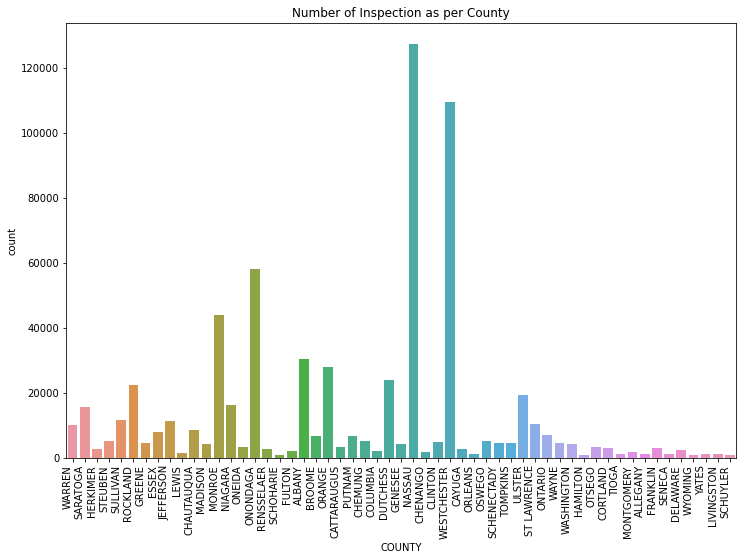

In [19]:
# Location
sns.countplot(data['COUNTY'])
sns.countplot(data['COUNTY']).set_xticklabels(sns.countplot(data['COUNTY']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf() 
fig.set_size_inches(12,8)
plt.title('Number of Inspection as per County')

# Classification Analysis

In [20]:
food_df.head()

,DATE OF INSPECTION,VIOLATION ITEM,VIOLATION DESCRIPTION,CRITICAL VIOLATION,TOTAL # CRITICAL VIOLATIONS,TOTAL # CRIT. NOT CORRECTED,TOTAL # NONCRITICAL VIOLATIONS,LOCAL HEALTH DEPARTMENT,COUNTY,FOOD SERVICE TYPE,FOOD SERVICE DESCRIPTION,PERMITTED (D/B/A),NYS HEALTH OPERATION ID,INSPECTION TYPE,INSPECTION COMMENTS,FS FACILITY STATE
102,11/05/2015,1D,Canned foods found in poor conditions (leakers...,Critical Violation,1.0,0.0,6.0,Nassau County,NASSAU,Food Service Establishment,Restaurant,ELEANOR RIGBY'S,571971,Inspection,"This establishment received a ""B"" rating. The...",NY
197,06/11/2010,1B,"Water/ice: unsafe, unapproved sources, cross c...",Critical Violation,1.0,0.0,1.0,Oswego County,OSWEGO,Food Service Establishment,Restaurant,SUBWAY-WEST,296775,Inspection,6/11/10\n\n10A ICE SCOOP BROKEN -VERY LARGE C...,NY
217,11/18/2016,1B,"Water/ice: unsafe, unapproved sources, cross c...",Critical Violation,4.0,0.0,15.0,Westchester County,WESTCHESTER,Food Service Establishment,Food Service Establishment,TASTE OF CHINA,443061,Inspection,Discussed: WIPING CLOTH PROCEDURE.; Use of san...,NY
235,06/10/2016,1F,"Shellfish not from approved sources, improperl...",Critical Violation,5.0,0.0,23.0,Westchester County,WESTCHESTER,Food Service Establishment,Food Service Establishment,PASTA PLUS,456448,Inspection,Unsatisfactory inspection. Re-inspection plann...,NY
236,10/12/2016,1F,"Shellfish not from approved sources, improperl...",Critical Violation,1.0,0.0,5.0,Westchester County,WESTCHESTER,Food Service Establishment,Food Service Establishment,LA CAMELIA,458988,Re-Inspection,Re-inspection scheduled for 10/19/16. Correct ...,NY


In [21]:
# Columns to drop
# Date of Inspection
# Violation Description - Violation item provides information about the type of the violation and description doesn't
# add much importance to the prediction.
# Local helath department - We are making predictions at the county level and not at the local health department level.
# Food service description - We are using food service type. Hence, we drop food service description.
# Permitted(D/B/A)-- This does not add any importance to the prediction. Hence, we drop this field.
# NYS HEALTH OPERATION ID - This is a unique column and unique columns do not add importance.
# INSPECTION COMMENTS
# FS FACILITY STATE - This dataset contains only records for the NY state. Hence, this doesn't add any importance in our 
# prediction

In [22]:
# print(food_df.columns)
food_df.drop(columns=[ 'DATE OF INSPECTION','VIOLATION DESCRIPTION','LOCAL HEALTH DEPARTMENT','FOOD SERVICE DESCRIPTION',
        'PERMITTED  (D/B/A)','NYS HEALTH OPERATION ID','INSPECTION COMMENTS','FS FACILITY STATE'], inplace=True)
food_df.head(5)

,VIOLATION ITEM,CRITICAL VIOLATION,TOTAL # CRITICAL VIOLATIONS,TOTAL # CRIT. NOT CORRECTED,TOTAL # NONCRITICAL VIOLATIONS,COUNTY,FOOD SERVICE TYPE,INSPECTION TYPE
102,1D,Critical Violation,1.0,0.0,6.0,NASSAU,Food Service Establishment,Inspection
197,1B,Critical Violation,1.0,0.0,1.0,OSWEGO,Food Service Establishment,Inspection
217,1B,Critical Violation,4.0,0.0,15.0,WESTCHESTER,Food Service Establishment,Inspection
235,1F,Critical Violation,5.0,0.0,23.0,WESTCHESTER,Food Service Establishment,Inspection
236,1F,Critical Violation,1.0,0.0,5.0,WESTCHESTER,Food Service Establishment,Re-Inspection


In [23]:
# CARDENALTIY REDUCTION
# Since the cardinality of the violation item column is too high, we reduce the cardenality by considering the sub-categories
# of all the violation items into its single category
# For example, violation items 1A, 1B, 1C.... will be taken as a single category 1.
food_df['VIOLATION ITEM'].unique()

array(['1D', '1B', '1F', '1H', '2A', '2C', '2E', '4A', '3C', '5A', '5B',
       '5C', '5D', '5E', '6A', '8A', '7F', '6B', '7G', '8B', '8D', '8C',
       '8E', '8F', '9B', '10A', '9C', '9D', '10B', '11A', '11B', '11C',
       '11D', '12A', '12C', '12E', '12D', '13A', '14A', '14B', '14C',
       '15A', '15B', '15C', '16', '2B', '3B', '8G', '13B', '15D', '1G',
       '9A', '7E', '7A', '1C', '2D', '3A', '12B'], dtype=object)

In [24]:
# Function to fetch the category of the violation
def get_violation_item_number(violation_id):
    if len(violation_id) == 2:
        return violation_id[0]
    elif len(violation_id) == 1:
        return violation_id
    else:
        return violation_id[:2]

In [25]:
# Creating a new column by applying the above defined function to the violation item column.
food_df['VIOLATION ITEM'] = food_df['VIOLATION ITEM'].apply(get_violation_item_number)

In [26]:
# food_df.head()

In [27]:
# The cadenality of the field has been reduced from 58 to 15 as shown below

print("Unique items:",food_df['VIOLATION ITEM'].unique())
print("Number of unique items",len(food_df['VIOLATION ITEM'].unique()))

Unique items: ['1' '2' '4' '3' '5' '6' '8' '7' '9' '10' '11' '12' '13' '14' '15']
Number of unique items 15


In [28]:
# print(food_df['FOOD SERVICE DESCRIPTION'].unique())
print("UNIQUE INSPECTION TYPE")
print("====================================")
print(food_df['FOOD SERVICE TYPE'].unique())

print("UNIQUE FOOD SERVICE TYPE")
print("====================================")
print(food_df['INSPECTION TYPE'].unique())

print("UNIQUE COUNTY")
print("====================================")
print(food_df['COUNTY'].unique())

print("UNIQUE CRITICAL VIOLATION")
print("====================================")
print(food_df['CRITICAL VIOLATION'].unique())

UNIQUE INSPECTION TYPE
['Food Service Establishment' 'Institutional Food Service'
 'SED Summer Feeding Prog.' 'SOFA Food Service']
UNIQUE FOOD SERVICE TYPE
['Inspection' 'Re-Inspection']
UNIQUE COUNTY
['NASSAU' 'OSWEGO' 'WESTCHESTER' 'HERKIMER' 'OTSEGO' 'MONTGOMERY' 'WARREN'
 'CLINTON' 'LEWIS' 'JEFFERSON' 'ST LAWRENCE' 'STEUBEN' 'CHEMUNG' 'FULTON'
 'TOMPKINS' 'MADISON' 'COLUMBIA' 'CORTLAND' 'SARATOGA' 'CHAUTAUQUA'
 'ROCKLAND' 'GREENE' 'SCHENECTADY' 'PUTNAM' 'NIAGARA' 'DELAWARE'
 'WASHINGTON' 'HAMILTON' 'SCHUYLER']
UNIQUE CRITICAL VIOLATION
['Critical Violation' 'Not Critical Violation']


# Label Encoding the categorical variables

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [30]:
le = LabelEncoder()

In [31]:
column_list = ['FOOD SERVICE TYPE','INSPECTION TYPE','COUNTY','CRITICAL VIOLATION']

In [32]:
for column in column_list:
    food_df[column] = le.fit_transform(food_df[column])


In [33]:
food_df.head(5)

,VIOLATION ITEM,CRITICAL VIOLATION,TOTAL # CRITICAL VIOLATIONS,TOTAL # CRIT. NOT CORRECTED,TOTAL # NONCRITICAL VIOLATIONS,COUNTY,FOOD SERVICE TYPE,INSPECTION TYPE
102,1,0,1.0,0.0,6.0,14,0,0
197,1,0,1.0,0.0,1.0,16,0,0
217,1,0,4.0,0.0,15.0,28,0,0
235,1,0,5.0,0.0,23.0,28,0,0
236,1,0,1.0,0.0,5.0,28,0,1


In [34]:
len(food_df)

6484

# Training the Dataset

In [35]:
X = food_df.drop(columns=['CRITICAL VIOLATION'])
y = food_df['CRITICAL VIOLATION']

In [36]:
print(X.shape)
print(y.shape)

(6484, 7)
(6484,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4538, 7)
(4538,)
(1946, 7)
(1946,)


# Applying the Classification Models

# Random Forest Classifier 

In [39]:
# Initiating the random forest classifier model
rand = RandomForestClassifier()

In [40]:
# Fitting the random forest model with the training data
rand.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
# Predicting the critical violation using the test data
# Storing the predicted critical violation values in the y_pred 

y_pred = rand.predict(X_test)

In [42]:
# Evaluation metrics to check the performance the random forest model

print("Confusion Matrix")
print("==========================")
print(confusion_matrix(y_test,y_pred))

print("Classification report")
print("==========================")
print(classification_report(y_test,y_pred))

print("Accuracy Score")
print("==========================")
print(round(accuracy_score(y_test,y_pred)*100,2))


Confusion Matrix
[[ 282   10]
 [  14 1640]]
Classification report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       292
           1       0.99      0.99      0.99      1654

    accuracy                           0.99      1946
   macro avg       0.97      0.98      0.98      1946
weighted avg       0.99      0.99      0.99      1946

Accuracy Score
98.77


# KNN Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
y_pred_knn = knn.predict(X_test)

In [47]:
# Evaluation metrics to check the performance the random forest model

print("Confusion Matrix")
print("==========================")
print(confusion_matrix(y_test,y_pred_knn))

print("Classification report")
print("==========================")
print(classification_report(y_test,y_pred_knn))

print("Accuracy Score")
print("==========================")
print(round(accuracy_score(y_test,y_pred_knn)*100,2))

Confusion Matrix
[[ 277   15]
 [  11 1643]]
Classification report
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       292
           1       0.99      0.99      0.99      1654

    accuracy                           0.99      1946
   macro avg       0.98      0.97      0.97      1946
weighted avg       0.99      0.99      0.99      1946

Accuracy Score
98.66


# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dec = DecisionTreeClassifier()

In [50]:
dec.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred_dec = dec.predict(X_test)

In [52]:
# Evaluation metrics to check the performance the random forest model

print("Confusion Matrix")
print("==========================")
print(confusion_matrix(y_test,y_pred_dec))

print("Classification report")
print("==========================")
print(classification_report(y_test,y_pred_dec))

print("Accuracy Score")
print("==========================")
print(round(accuracy_score(y_test,y_pred_dec)*100,2))

Confusion Matrix
[[ 282   10]
 [  14 1640]]
Classification report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       292
           1       0.99      0.99      0.99      1654

    accuracy                           0.99      1946
   macro avg       0.97      0.98      0.98      1946
weighted avg       0.99      0.99      0.99      1946

Accuracy Score
98.77


# Logistic Classifier

In [53]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

In [54]:
lg= LogisticRegression()

In [55]:
lg.fit(X_train,y_train)

LogisticRegression()

In [56]:
y_pred_lg = lg.predict(X_test)

In [57]:
# Evaluation metrics to check the performance the Logistics classifier model

print("Confusion Matrix")
print("==========================")
print(confusion_matrix(y_test,y_pred_lg))

print("Classification report")
print("==========================")
print(classification_report(y_test,y_pred_lg))

print("Accuracy Score")
print("==========================")
print(round(accuracy_score(y_test,y_pred_lg)*100,2))

Confusion Matrix
[[ 234   58]
 [  65 1589]]
Classification report
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       292
           1       0.96      0.96      0.96      1654

    accuracy                           0.94      1946
   macro avg       0.87      0.88      0.88      1946
weighted avg       0.94      0.94      0.94      1946

Accuracy Score
93.68
